In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

## Shapes and Datatypes

In [2]:
#https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
df = pd.read_csv('walmart_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


- Observations
    - No Missing values in dataset 

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Value Counts and unique values for categorical attributes

In [17]:
categorical_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

In [18]:
for col in categorical_cols:
    print(df[col].value_counts(sort=False))
    print('----------------------------------')

F    135809
M    414259
Name: Gender, dtype: int64
----------------------------------
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64
----------------------------------
A    147720
B    231173
C    171175
Name: City_Category, dtype: int64
----------------------------------
0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64
----------------------------------
0    324731
1    225337
Name: Marital_Status, dtype: int64
----------------------------------


In [290]:
cols = []
for col in df.columns:
    print('{} unique values for attribute {}'.format(df[col].nunique(), col))

5891 unique values for attribute User_ID
3631 unique values for attribute Product_ID
2 unique values for attribute Gender
7 unique values for attribute Age
21 unique values for attribute Occupation
3 unique values for attribute City_Category
5 unique values for attribute Stay_In_Current_City_Years
2 unique values for attribute Marital_Status
20 unique values for attribute Product_Category
18105 unique values for attribute Purchase


In [19]:
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


## Statistical Summary

In [10]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


- Observations
    - Minimun value for transaction is 12 and maximum is 23961
    - There are 21 occupation categories
    - There are 20 product categories
    - There are total 5891 users who have made atleast a transaction
    - There are 3631 different products
    - There are 3 categories of cities    

## Univariate Analysis

                                      value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Occupation                 0      12.659889
                           1       8.621843
                           2       4.833584
                           3       3.208694
                           4      13.145284
                           5       2.213726
                           6    

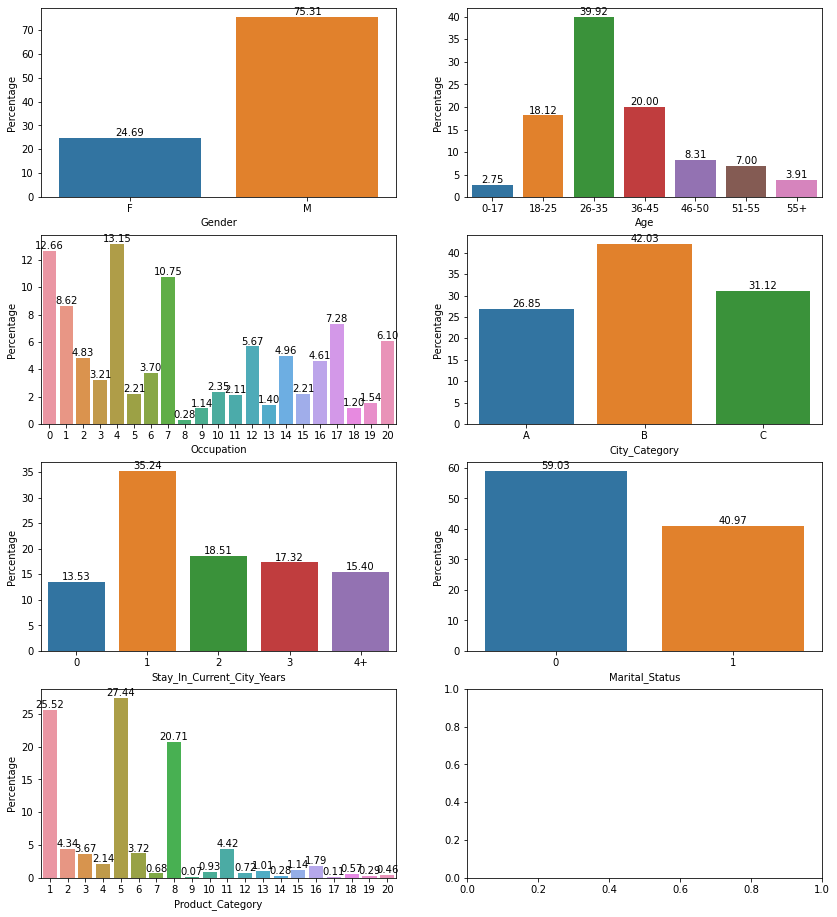

In [325]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
melted_result = df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()*100/len(df)
print(melted_result)
ncols = 2
nrows = math.ceil(len(categorical_cols)/ncols)
xlen = ncols*7
ylen = 4*nrows
f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(xlen, ylen))
for idx, col in enumerate(categorical_cols):
    d = melted_result.loc[col]
    axis = ax[idx//ncols, idx%ncols]
    ax1 = sns.barplot(x=d.index, y=d.values.reshape(len(d)), ax=axis)
    ax1.set(xlabel=col, ylabel='Percentage')
    for bars in axis.containers:
        ax1.bar_label(bars, fmt='%.2f')
            
plt.show()

In [327]:
# ncols = 2
# nrows = math.ceil(len(categorical_cols)/ncols)
# xlen = ncols*7
# ylen = 4*nrows
# f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(xlen, ylen))
# for idx, col in enumerate(categorical_cols):
#     if nrows > 1 and ncols > 1:
#         axis = ax[idx//ncols, idx%ncols]
#     else:
#         axis = ax[idx]
#     sns.countplot(data=df, x=col, ax=axis)
# plt.show()

- Observations
    - In all transactions, 75% users are male and 25% are female
    - 78 % users are in age range of 18 - 45 years
    - Top 3 occupation of buyers is 0, 4, 7 (masked.
    - Most buyers lie in city category B
    - Unmarried users are 60% and married are 40%
    - Users who are staying since 1 year are purchasing mostly
    - Product category 1, 5 and 8 is purchased mainly

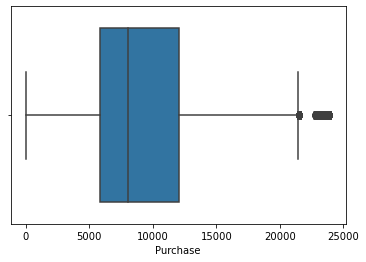

In [330]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

- Purchase is having outliers

## Bivariate Analysis

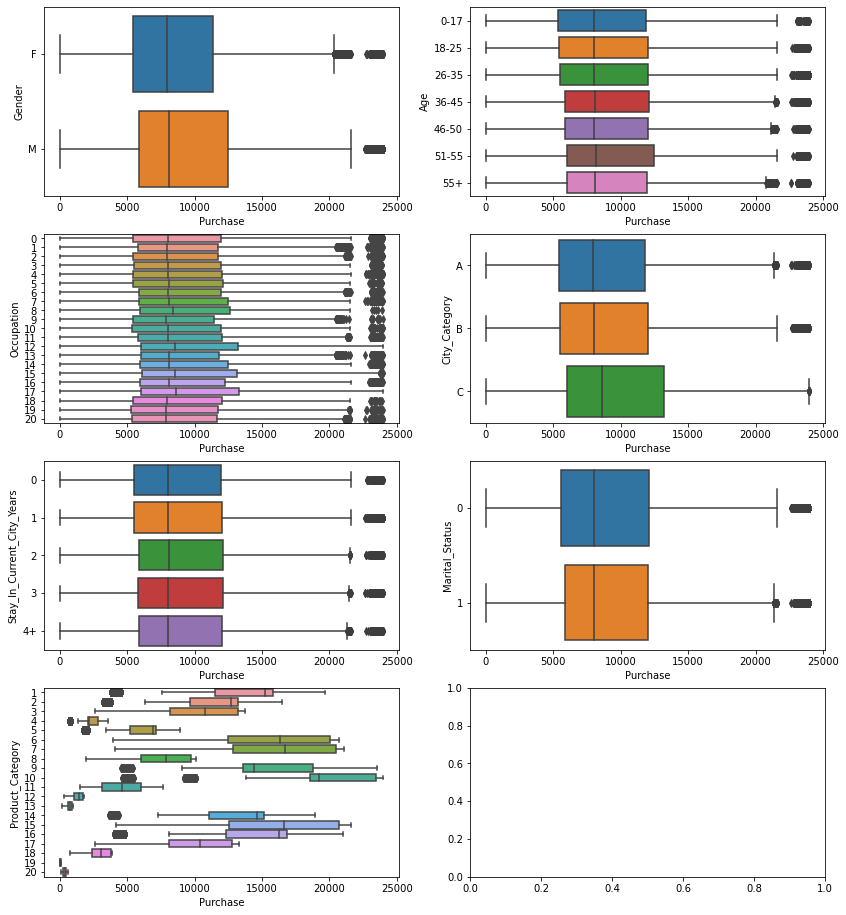

In [332]:
ncols = 2
nrows = math.ceil(len(categorical_cols)/ncols)
xlen = ncols*7
ylen = 4*nrows
f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(xlen, ylen))
for idx, col in enumerate(categorical_cols):
    if nrows > 1 and ncols > 1:
        axis = ax[idx//ncols, idx%ncols]
    else:
        axis = ax[idx]
    sns.boxplot(data=df, x='Purchase', y=col, ax=axis, orient='h')
plt.show()

In [329]:
for col in categorical_cols:
    d = df[[col, 'Purchase']].groupby(col).mean()
    print(d)

           Purchase
Gender             
F       8734.565765
M       9437.526040
          Purchase
Age               
0-17   8933.464640
18-25  9169.663606
26-35  9252.690633
36-45  9331.350695
46-50  9208.625697
51-55  9534.808031
55+    9336.280459
               Purchase
Occupation             
0           9124.428588
1           8953.193270
2           8952.481683
3           9178.593088
4           9213.980251
5           9333.149298
6           9256.535691
7           9425.728223
8           9532.592497
9           8637.743761
10          8959.355375
11          9213.845848
12          9796.640239
13          9306.351061
14          9500.702772
15          9778.891163
16          9394.464349
17          9821.478236
18          9169.655844
19          8710.627231
20          8836.494905
                  Purchase
City_Category             
A              8911.939216
B              9151.300563
C              9719.920993
                               Purchase
Stay_In_Current_City_Y

- Observations
    - Average Purchase amount for product category 10 is relatively much higher
    - Average Purchase amount for users residing in city category C is relatively much higher
    - Average Purchase amount for males is relatively much higher
    - Nothing more significant came from bivariate analysis

## Multivariate Analysis

## Using Gender

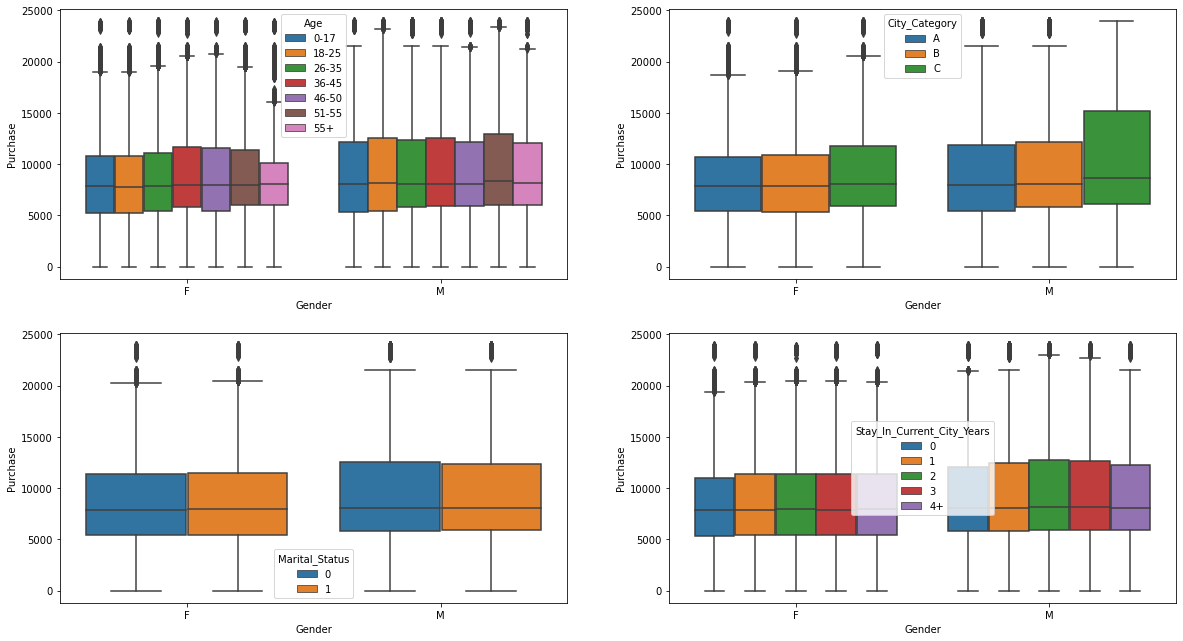

In [347]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

## Using Age

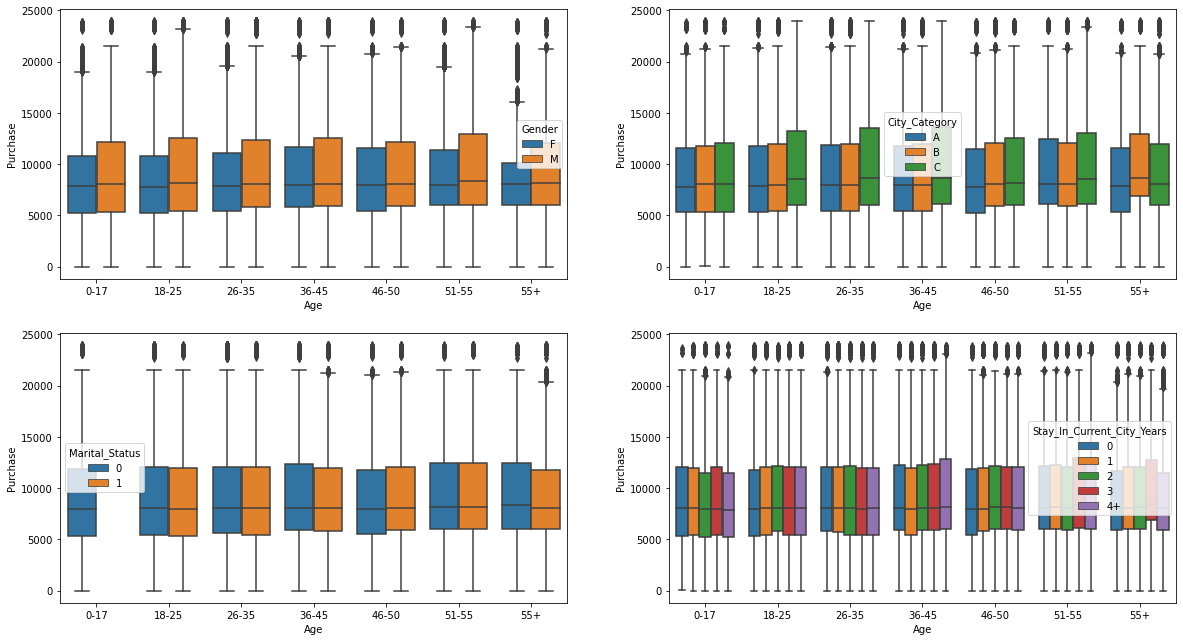

In [348]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Age', hue='Gender', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Age', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Age', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Age', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

## Using City category

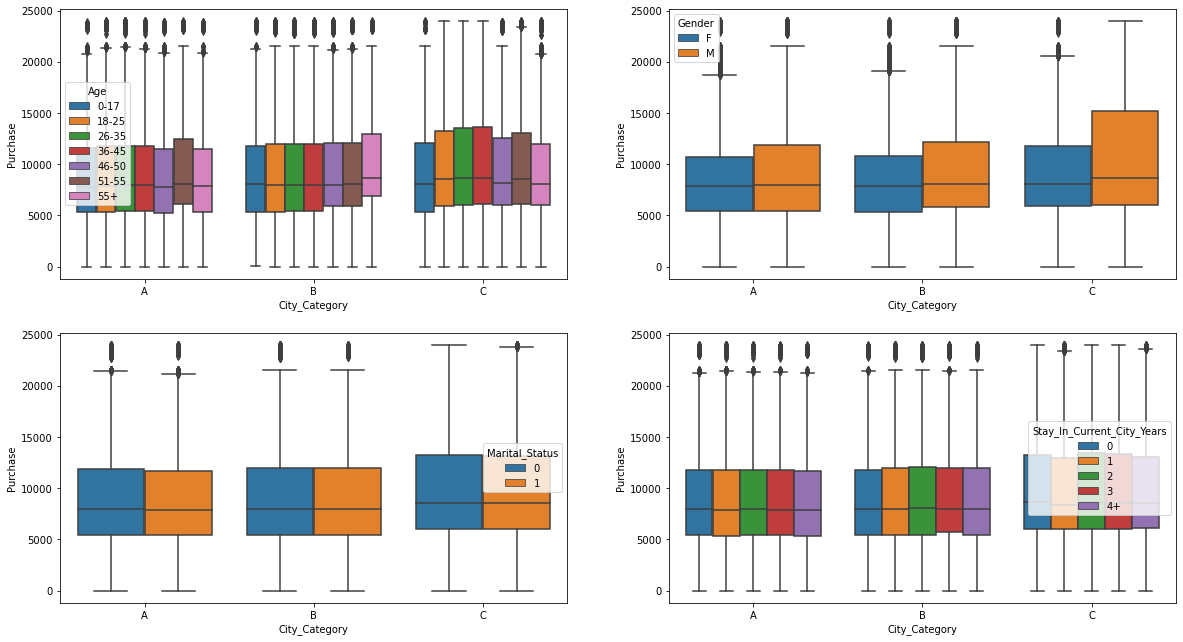

In [349]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Gender', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

## Using Years Stay In Current City

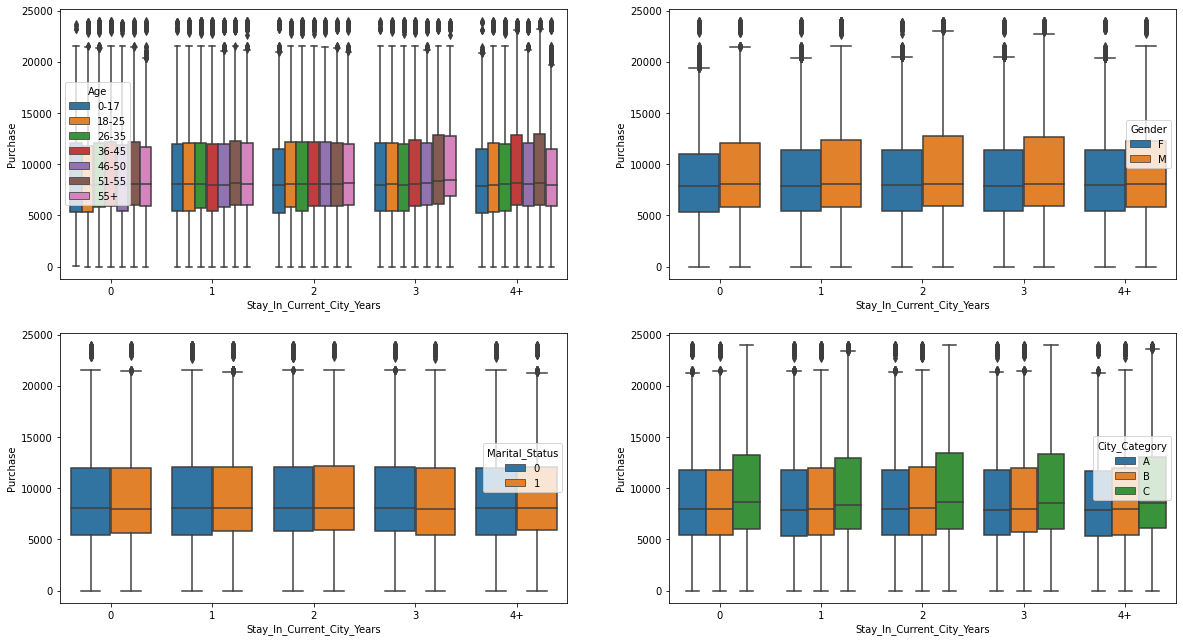

In [350]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', hue='Gender', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', hue='City_Category', ax=axs[1,1])

plt.show()

- Observations
    - Males from city C are much active
    - In city B, senior citizens spends more than other age groups
    - Other than these no significant observation from multivariate analysis

## Relation between attributes

In [351]:
df.corr()

,User_ID,Occupation,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.003825,0.004716
Occupation,-0.023971,1.000000,-0.007618,0.020833
Product_Category,0.003825,-0.007618,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.343703,1.000000


- Product category is more related to purchase amount

### Central Limit Theorem 

In [285]:
def calculate_ci(df, cols, ci_width_list, sample_size_list):
    #for col_val in df[column].unique():
    output = {}
    for col in cols:
        print('*'*50)
        print('{} wise Confidence Intervals'.format(col))
        col_values = df[col].unique()
        ncols = len(sample_size_list)
        nrows = len(ci_width_list) * len(col_values)
        xcord = 0
        xlen = ncols*7
        ylen = nrows*4
        f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(xlen, ylen))
        f.subplots_adjust(hspace=0.4)
        for k, col_val in enumerate(col_values):
            data = df[df[col]==col_val].Purchase
            population_mean = data.mean()
            population_std = data.std(ddof=0)
            print('For column value {}'.format(col_val))
            print('Population size : {}'.format(len(data)))
            print('Population mean : {}'.format(population_mean))
            print('Population s.d. : {}'.format(population_std))
            print('Calculating CI for combinations of CI width and sample size')
            #print('Confidence Interval Width    Sample Size')
            for j, ci_width in enumerate(ci_width_list):
                for i, sample_size in enumerate(sample_size_list):
                    axis = ax[xcord//ncols, i]
                    avg_list = np.empty(iterations)
                    for i in range(iterations):
                        sample = data.sample(sample_size)
                        avg_list[i] = sample.mean()
                        #if i < 5:
                           #print(sample.std(ddof=1)/math.sqrt(sample_size))    
                    sampling_ds_mean = avg_list.mean()
                    sampling_ds_std = population_std/math.sqrt(sample_size)
                    sample_means_std = avg_list.std(ddof=1)
                    #print('CI width : {}%, Sample size : {}'.format(ci_width, sample_size))
                    #print('Sampling distribution mean : {}'.format(sampling_ds_mean))
                    #print('Sampling distribution’s standard deviation : {}'.format(sampling_ds_std))
                    #print('Sampling means standard deviation : {}'.format(sample_means_std))
                    key = '{}:{}:{}:{}'.format(col, col_val, ci_width, sample_size)
                    #print('Calculating CI for {}...'.format(key))
                    left_lim = round(sampling_ds_mean - ci_dict[ci_width]*sampling_ds_std, 2)
                    right_lim = round(sampling_ds_mean + ci_dict[ci_width]*sampling_ds_std, 2)
                    ci_out = (left_lim, right_lim)
                    output[key] = ci_out
                    #print('CI for {}% : [{}, {}]'.format(ci_width, ci_out[0], ci_out[1]))
                    axis.set_xlabel("In CI of [{}, {}], {}% values lie".format(ci_out[0], ci_out[1], ci_width))
                    axis.set_title("{} ({}) - Sample Size {}".format(col, col_val, sample_size))
                    sns.histplot(avg_list, kde=True, stat='density', ax=axis)
                    #print('Checking by filtering data using computed Confidence Interval....')
                    #fil_data = list(filter(lambda x: ci_out[0] <= x and ci_out[1] >= x, avg_list))
                    #print('{} % lies in [{}, {}]'.format(len(fil_data)*100/len(avg_list), ci_out[0], ci_out[1]))
                    #print()
                    xcord += 1
            print('-'*50)
        plt.show()
        
    print('Column Name       Column Value    CI width    Sample Size    Confidence Interval')
    print('='*83)
    for i in output:
        col, col_val, ci_width, sample_size = i.split(':')
        #print('CI for Column: {:>14} with col value: {:>5} and parameters ci width: {:>4} \
        #and sample size: {:>4} is {}'.format(col, col_val, ci_width, sample_size, output[i]))
        print('{:<14}{:>16}{:>11}%{:>15}{:>23}'.format(col, col_val, ci_width, sample_size, str(output[i])))


09:56:30
**************************************************
Gender wise Confidence Intervals
For column value F
Population size : 135809
Population mean : 8734.565765155476
Population s.d. : 4767.215738016988
Calculating CI for combinations of CI width and sample size
--------------------------------------------------
For column value M
Population size : 414259
Population mean : 9437.526040472265
Population s.d. : 5092.180063635943
Calculating CI for combinations of CI width and sample size
--------------------------------------------------


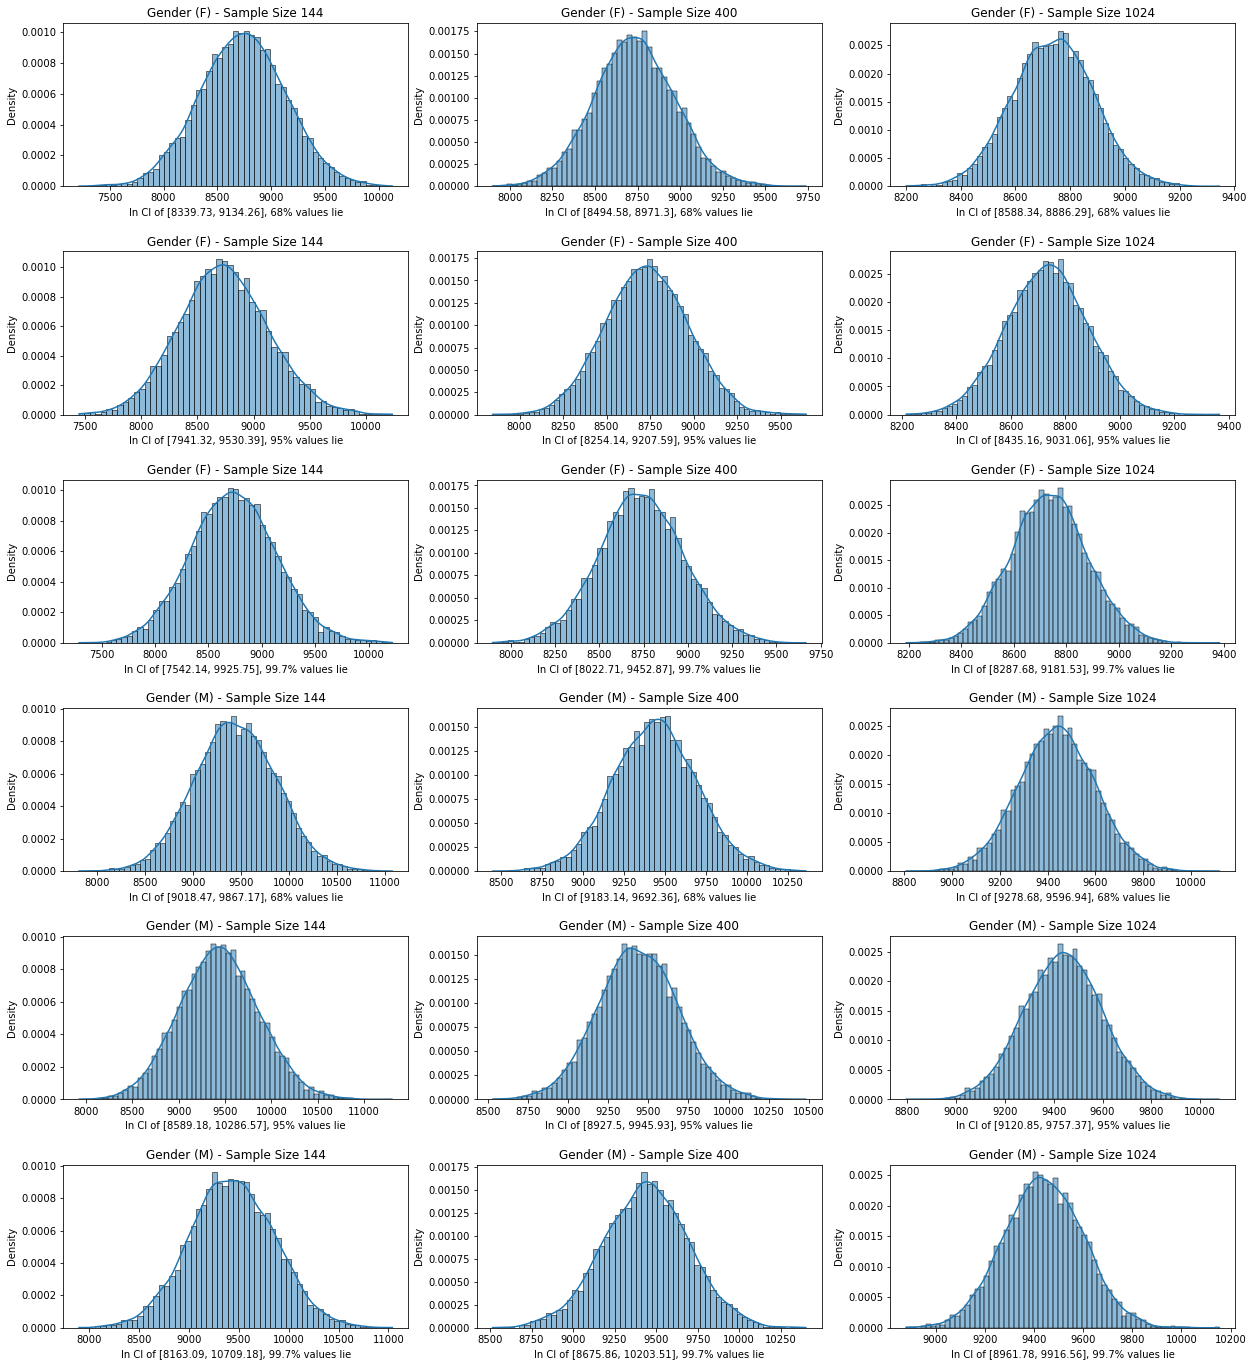

**************************************************
Age wise Confidence Intervals
For column value 0-17
Population size : 15102
Population mean : 8933.464640444974
Population s.d. : 5110.944823427657
Calculating CI for combinations of CI width and sample size
--------------------------------------------------
For column value 55+
Population size : 21504
Population mean : 9336.280459449405
Population s.d. : 5011.377469555721
Calculating CI for combinations of CI width and sample size
--------------------------------------------------
For column value 26-35
Population size : 219587
Population mean : 9252.690632869888
Population s.d. : 5010.515894010119
Calculating CI for combinations of CI width and sample size
--------------------------------------------------
For column value 46-50
Population size : 45701
Population mean : 9208.625697468327
Population s.d. : 4967.162022122683
Calculating CI for combinations of CI width and sample size
--------------------------------------------------
F

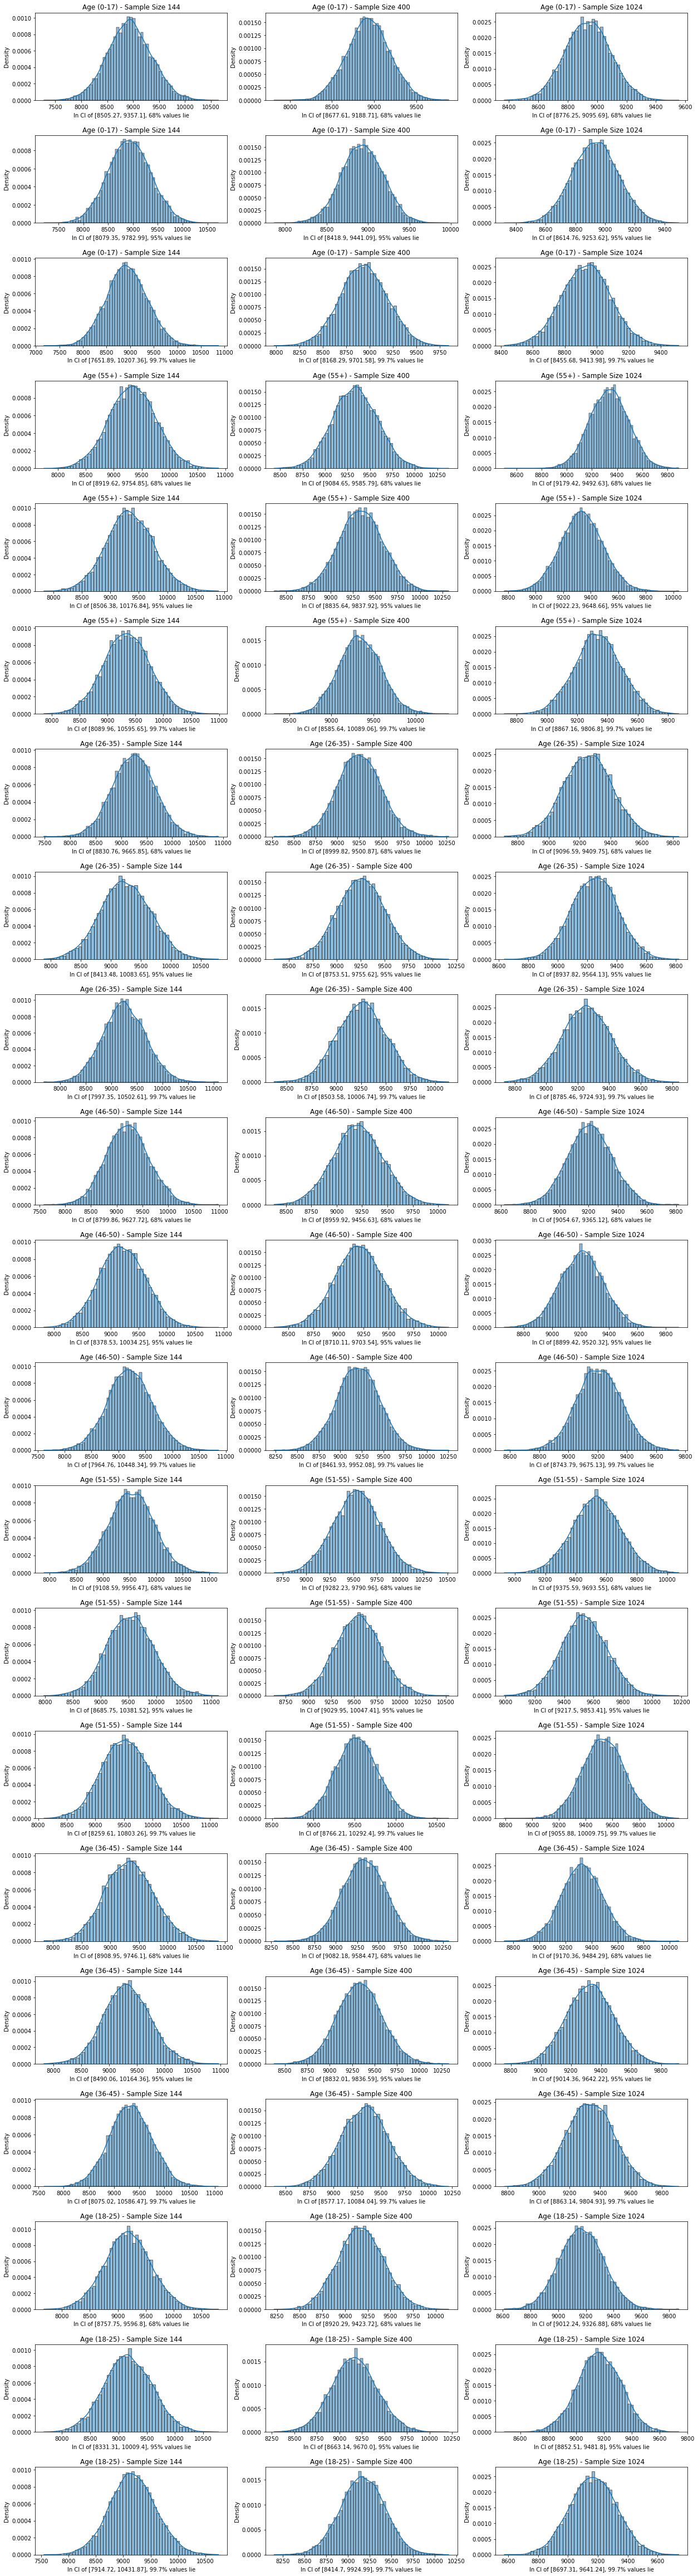

**************************************************
Marital_Status wise Confidence Intervals
For column value 0
Population size : 324731
Population mean : 9265.907618921507
Population s.d. : 5027.340117880186
Calculating CI for combinations of CI width and sample size
--------------------------------------------------
For column value 1
Population size : 225337
Population mean : 9261.174574082374
Population s.d. : 5016.886245793184
Calculating CI for combinations of CI width and sample size
--------------------------------------------------


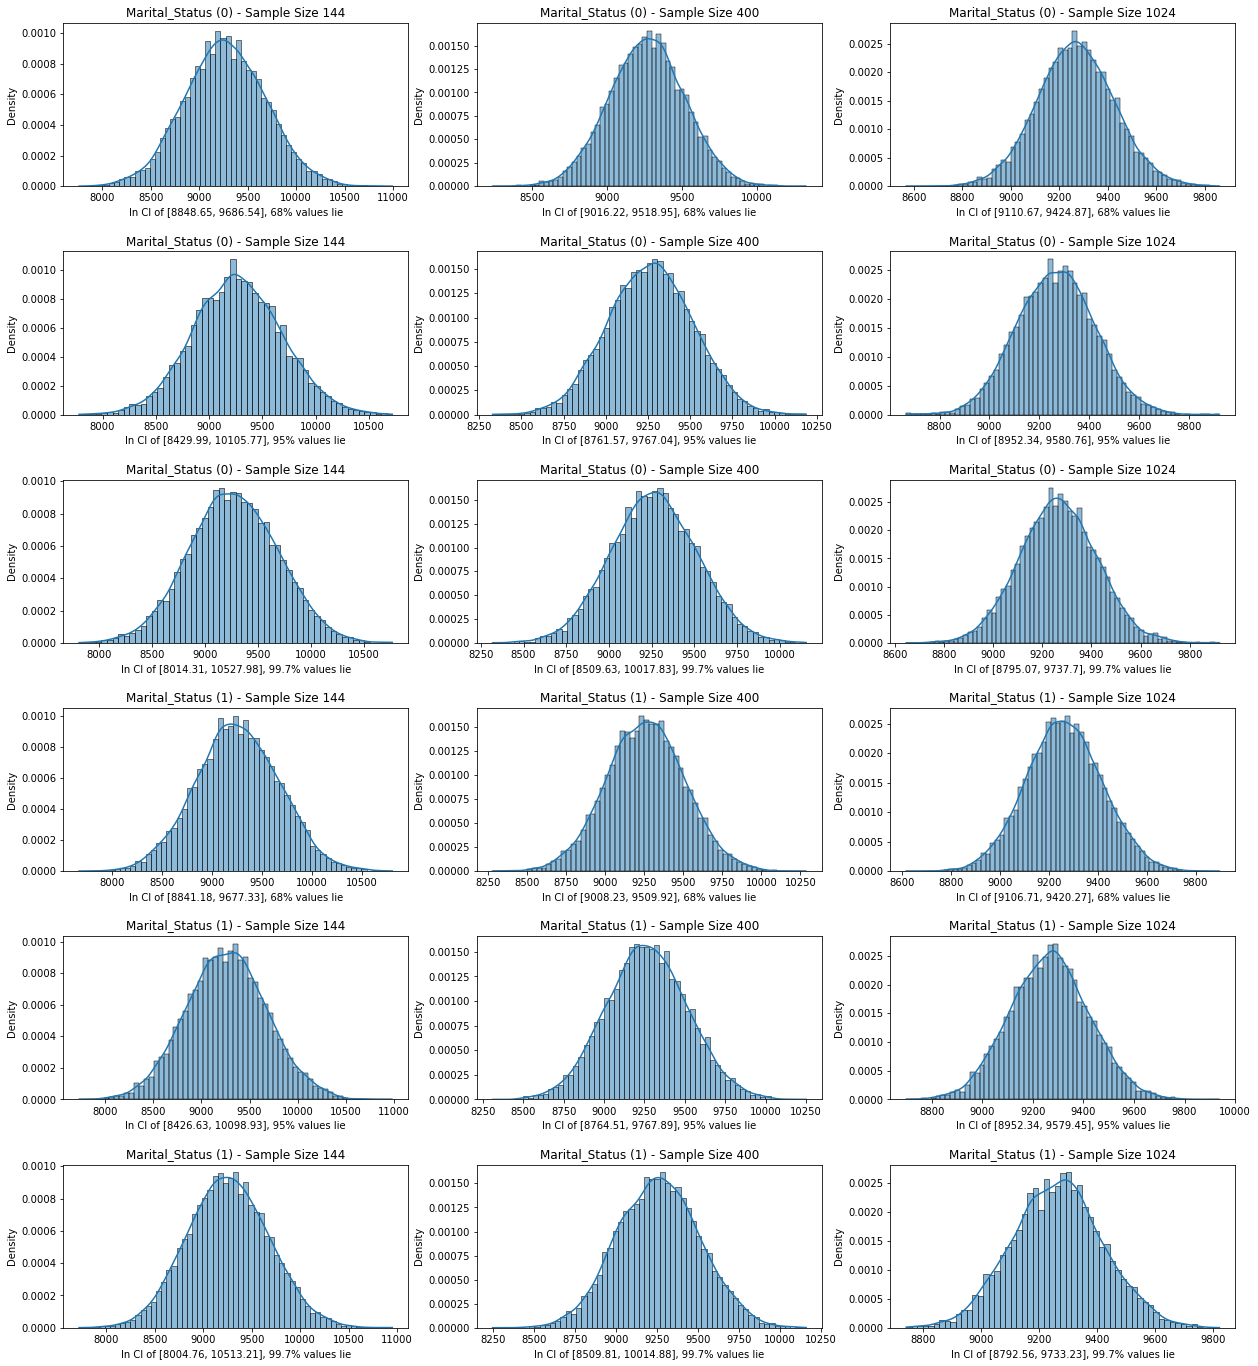

   Column Name    Column Value    CI width    Sample Size    Confidence Interval
        Gender               F         68%            144     (8339.73, 9134.26)
        Gender               F         68%            400      (8494.58, 8971.3)
        Gender               F         68%           1024     (8588.34, 8886.29)
        Gender               F         95%            144     (7941.32, 9530.39)
        Gender               F         95%            400     (8254.14, 9207.59)
        Gender               F         95%           1024     (8435.16, 9031.06)
        Gender               F       99.7%            144     (7542.14, 9925.75)
        Gender               F       99.7%            400     (8022.71, 9452.87)
        Gender               F       99.7%           1024     (8287.68, 9181.53)
        Gender               M         68%            144     (9018.47, 9867.17)
        Gender               M         68%            400     (9183.14, 9692.36)
        Gender              

In [284]:
from timeit import default_timer as timer
from datetime import datetime, timedelta
start = timer()
print(datetime.now().strftime("%H:%M:%S"))
ci_dict = {68: 1, 95: 2, 99.7: 3}
#by applying Central limit theorem we know 68% data lies within 1st s.d. and 95% within 2nd s.d. and 99.7% within 3rd s.d.
iterations = 10000
cols = ['Gender', 'Age', 'Marital_Status']
sample_size_list = [144, 400, 1024]
ci_width_list = [68, 95, 99.7]
calculate_ci(df, cols, ci_width_list, sample_size_list)

print(datetime.now().strftime("%H:%M:%S"))
print('It took {} seconds'.format(timer() - start))

- Observations
    - Increasing only the sample size we get more converged and accurate confidence interval
    - Increasing only the CI width we get broader interval which makes sense
    - In most cases male-female, married-unmarried and age groups confidence intervals overlap

## Recommendations

- Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
- Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
- Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
- Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
- Male customers living in City_Category C spend more money than other male customers living in A or B, Selling more products in the City_Category C will help the company increase the revenue.
 